### Word Cloud

In [16]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

- stopwords

In [17]:
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')
print(sw_nltk)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\YONSAI/nltk_data'
    - 'c:\\Users\\YONSAI\\anaconda3\\nltk_data'
    - 'c:\\Users\\YONSAI\\anaconda3\\share\\nltk_data'
    - 'c:\\Users\\YONSAI\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\YONSAI\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [12]:
# WordCloud에서 불용어
sw_wc = STOPWORDS
print(sw_wc)

{"shouldn't", "don't", 'theirs', "wouldn't", "when's", 'of', 'nor', "who's", 'since', "we'll", 'their', "i've", 'you', 'into', 'about', 'just', 'all', 'some', 'yours', "it's", 'so', 'would', 'had', "mustn't", 'i', 'its', 'does', "i'm", 'your', 'be', 'before', 'however', 'www', 'our', 'cannot', 'did', 'also', 'to', 'whom', 'com', 'no', 'me', "they'd", "where's", 'between', 'should', 'both', 'such', 'as', "you've", 'do', 'itself', 'down', "he's", 'below', 'he', 'once', 'are', "that's", 'while', "she's", 'with', 'therefore', "didn't", 'she', "weren't", "aren't", 'can', 'yourself', 'most', 'doing', 'then', 'through', 'that', "you'll", 'too', 'not', "they'll", "let's", "shan't", "she'll", 'there', 'get', 'a', 'them', 'could', 'themselves', 'at', "can't", 'the', 'else', 'and', "they've", 'on', "here's", "she'd", "hadn't", 'above', 'when', 'during', "we've", "i'll", 'for', 'more', 'like', "how's", 'an', 'other', 'ourselves', 'under', 'were', "haven't", 'is', 'was', 'myself', "you're", 'ever',

In [13]:
len(sw_nltk), len(sw_wc)

NameError: name 'sw_nltk' is not defined

- Alice in Wonderland

In [20]:
with open('data/Alice.txt') as f:
    text = f.read()

In [21]:
# 불용어에 'said' 추가
sw_wc.add('said')

In [22]:
wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=sw_wc
).generate(text)

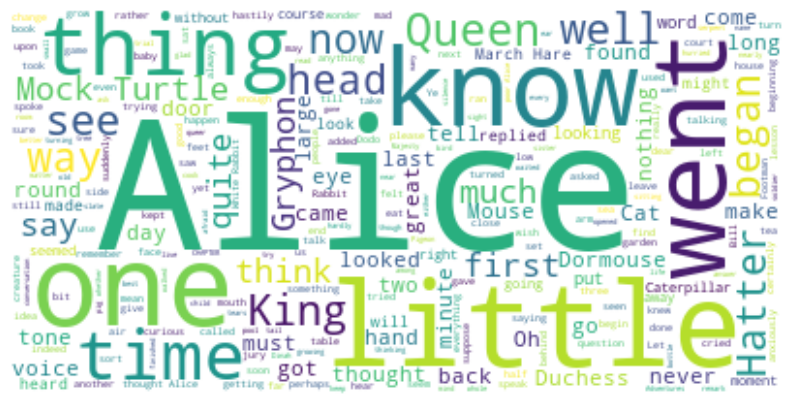

In [24]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
# 사용빈도 Top 10
count = 0
for key, val in wc.words_items():
    print(f'{key}:\t{val}')
    count += 1
    if count >= 10:
        break

AttributeError: 'WordCloud' object has no attribute 'words_items'

- 배경 그림위에 표시하기

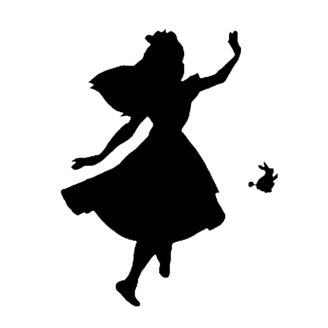

In [39]:
mask  = np.array(Image.open('data/Alice_mask.png'))
plt.figure(figsize=(5,4))
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off');

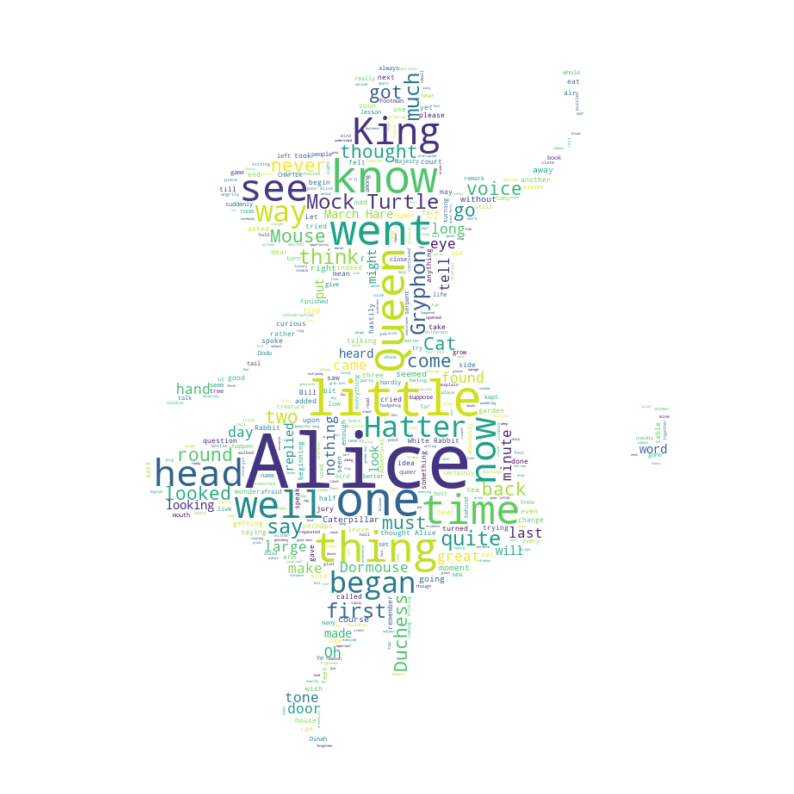

In [36]:
    wc = WordCloud(
        background_color='white',
        max_words=2000,
        stopwords=sw_wc,
        mask=mask
    ).generate(text)
plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

star wars

In [37]:
with open('data/A_new_hope.txt') as f:
    text = f.read()
text = text.replace('HAN', 'Han').replace("LUKE'S", 'Luke')

In [38]:
sw = STOPWORDS
sw.add('int')
sw.add('ext')
len(sw)

195

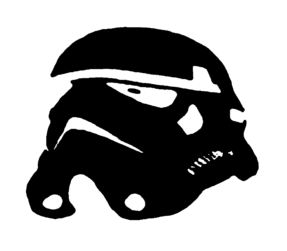

In [41]:
mask  = np.array(Image.open('data/Stormtrooper_mask.png'))
plt.figure(figsize=(5,3))
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off');

In [42]:
wc = WordCloud(
    mask=mask, max_words=1000, stopwords=sw,
    margin=10, random_state=2023
).generate(text)
default_colors = wc.to_array

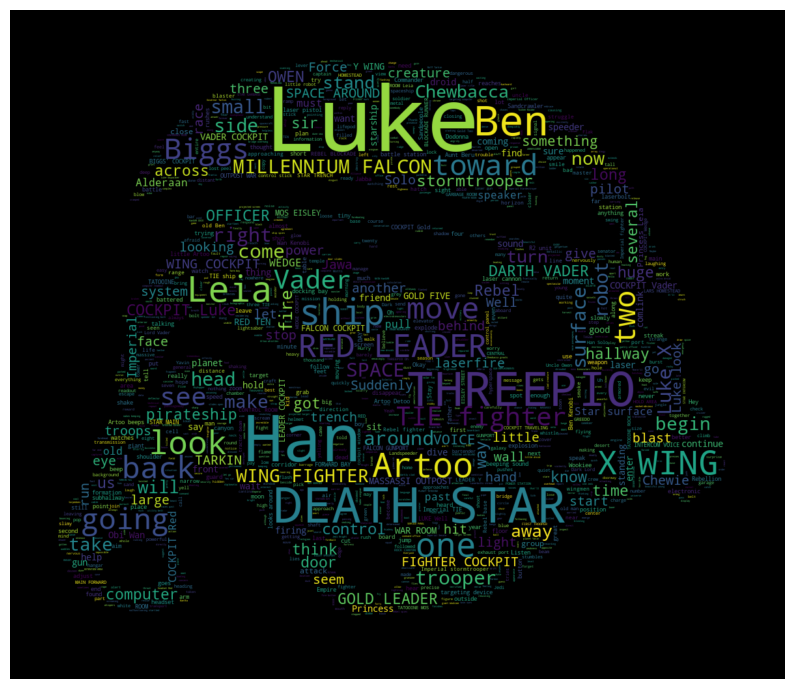

In [44]:
wc = WordCloud(
    background_color='black',
    max_words=2000,
    stopwords=sw_wc,
    mask=mask
    ).generate(text)
plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [51]:
# HSL : Hue, Saturation(채도), lightness(명도)
def grey_color(word, font_size, position, orientation,random_state, **kwargs):
    return f'hsl(0, 0%, {np.random.randint(60,101)}%)'

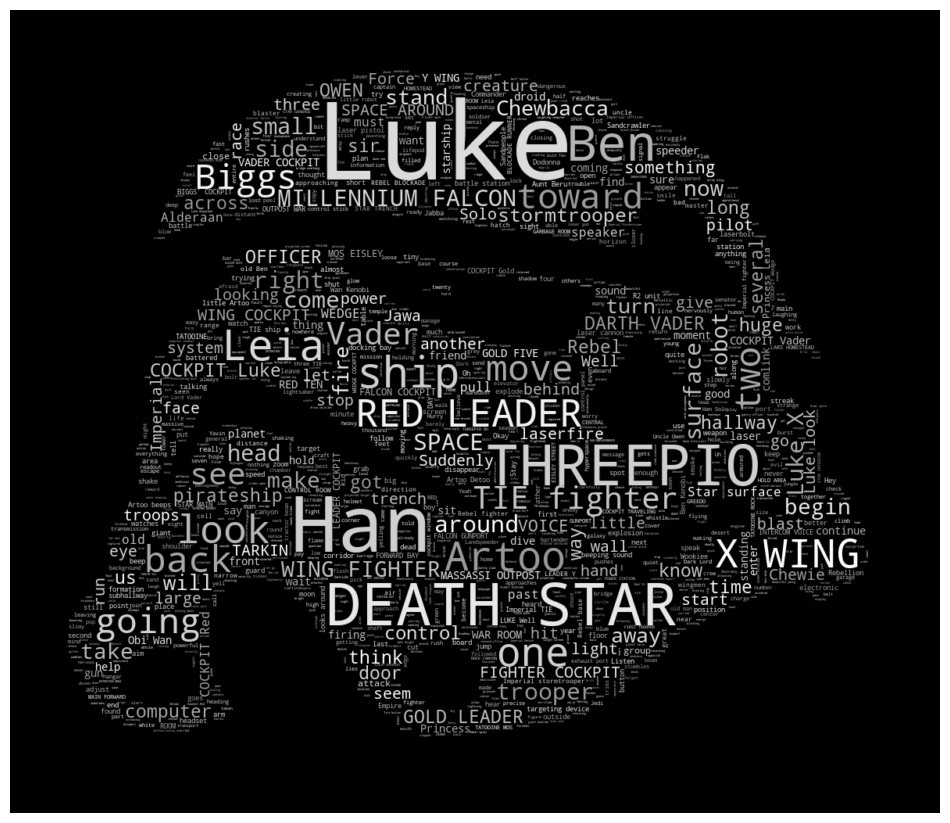

In [52]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func= grey_color, random_state =2023),
                      interpolation='bilinear')
plt.axis('off');